# Final Project : DATA 602 - Impact on Russia due to its invasion over Ukraine

## Introduction

Russian invasion of Ukraine commenced on February 24 2022, the invasion marked a major escalation of the Russo-Ukrainian War, which began following the 2014 Ukrainian Revolution of Dignity. Russia subsequently annexed Crimea, and Russian-backed separatists seized part of the south-eastern Donbas region of Ukraine, sparking a war there.

With the start of the invasion both Countries have been facing huge losses in terms of Military and Economy. For this project scope I would be analyzing the impact of this invasion on Russian Military, Russain economy.

**Video link  -  https://youtu.be/-v1t4VSGBsI**

## Required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

## Military impact

I will use the dataset from Kaggle[https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war] to understand the impact of this invasion over the Russain Military resources and personnel.

### Equipment losses

I downloaded the kaggle dataset **russia_losses_equipment.csv** and uploaded on my github and reference it there for this project.
Main data sources are <a href="https://www.zsu.gov.ua/en">Armed Forces of Ukraine</a> and <a href="https://www.mil.gov.ua/en/">Ministry of Defence of Ukraine</a>. They gathered data from different points of the country. The calculation is complicated by the high intensity of hostilities.

**Tracking**
- Personnel
- Prisoner of War
- Armored Personnel Carrier
- Multiple Rocket Launcher
- Aircraft
- Anti-aircraft warfare
- Drone
- Field Artillery
- Fuel Tank
- Helicopter
- Military Auto
- Naval Ship
- Tank

**Acronyms**
- POW - Prisoner of War,
- MRL - Multiple Rocket Launcher,
- APC - Armored Personnel Carrier,
- SRBM - Short-range ballistic missile,
- drones:
  - UAV - Unmanned Aerial Vehicle,
  - RPA - Remotely Piloted Vehicle.

### Data loading

In [3]:
#read the dataset into df_equipment
df_equipment = pd.read_csv("https://raw.githubusercontent.com/petferns/DATA602/main/russia_losses_equipment.csv")
# The data is commutative. It means each new record is accumulated data from previous days.
df_equipment.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN


In [86]:
#segregate data on a daily basis for our analysis

df_equipment['date'] = pd.to_datetime(df_equipment['date'])
df_equipment = df_equipment.set_index(['date', 'day'])
df_equipment = df_equipment.diff().fillna(df_equipment).fillna(0).astype(int).reset_index()
df_equipment
df_equipment_org =df_equipment

### Data exploration

In [4]:
df_equipment.shape

(86, 17)

In [6]:
df_equipment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     86 non-null     object 
 1   day                      86 non-null     int64  
 2   aircraft                 86 non-null     int64  
 3   helicopter               86 non-null     int64  
 4   tank                     86 non-null     int64  
 5   APC                      86 non-null     int64  
 6   field artillery          86 non-null     int64  
 7   MRL                      86 non-null     int64  
 8   military auto            65 non-null     float64
 9   fuel tank                65 non-null     float64
 10  drone                    86 non-null     int64  
 11  naval ship               86 non-null     int64  
 12  anti-aircraft warfare    86 non-null     int64  
 13  special equipment        67 non-null     float64
 14  mobile SRBM system       36 

In [7]:
df_equipment.describe()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,65.000000,65.000000,86.000000,86.000000,86.000000,67.000000,36.000000,21.000000,21.000000
mean,44.500000,135.674419,124.441860,715.325581,1912.976744,330.825581,113.313953,1047.507692,69.323077,152.127907,6.918605,56.383721,28.358209,3.944444,2002.666667,93.666667
std,24.969982,59.150942,41.748436,333.912227,680.290751,156.464557,52.901743,466.162060,7.545917,146.060728,3.538744,24.978187,9.619585,0.333333,116.767861,6.142746
min,2.000000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,2.000000,0.000000,10.000000,2.000000,1796.000000,84.000000
25%,23.250000,93.500000,112.750000,454.000000,1453.500000,207.000000,72.000000,600.000000,60.000000,13.250000,3.000000,43.250000,24.000000,4.000000,1926.000000,90.000000
50%,44.500000,150.500000,135.500000,702.500000,1893.000000,334.000000,108.000000,1178.000000,73.000000,112.000000,7.000000,55.000000,27.000000,4.000000,1997.000000,94.000000
75%,65.750000,189.750000,155.000000,1002.500000,2438.250000,435.750000,151.000000,1437.000000,76.000000,231.250000,8.000000,76.000000,38.000000,4.000000,2101.000000,97.000000
max,87.000000,204.000000,169.000000,1278.000000,3116.000000,596.000000,201.000000,1701.000000,76.000000,462.000000,13.000000,93.000000,43.000000,4.000000,2178.000000,104.000000


### Total count of equpiments lost per category

In [35]:
column_list = list(df_equipment)
column_list

['date',
 'day',
 'aircraft',
 'helicopter',
 'tank',
 'APC',
 'field artillery',
 'MRL',
 'military auto',
 'fuel tank',
 'drone',
 'naval ship',
 'anti-aircraft warfare',
 'special equipment',
 'mobile SRBM system',
 'vehicles and fuel tanks',
 'cruise missiles']

In [36]:
#exclude date and day
column_list.remove("date")
column_list.remove("day")
column_list

['aircraft',
 'helicopter',
 'tank',
 'APC',
 'field artillery',
 'MRL',
 'military auto',
 'fuel tank',
 'drone',
 'naval ship',
 'anti-aircraft warfare',
 'special equipment',
 'mobile SRBM system',
 'vehicles and fuel tanks',
 'cruise missiles']

APC(Armored Personnel Carrier) is the highest equpiment type lost followed by Military auto and Tank. Mobile SRBM system is the lowest equipment type lost.

In [33]:
total = df_equipment[column_list].sum()
total.sort_values(ascending=False)

APC                        164516.0
military auto               68088.0
tank                        61518.0
vehicles and fuel tanks     42056.0
field artillery             28451.0
drone                       13083.0
aircraft                    11668.0
helicopter                  10702.0
MRL                          9745.0
anti-aircraft warfare        4849.0
fuel tank                    4506.0
cruise missiles              1967.0
special equipment            1900.0
naval ship                    595.0
mobile SRBM system            142.0
dtype: float64

Russian army has lost around 423786 of its equpiments across 15 categories until now in its war with Ukrain

In [66]:
df_equipment[column_list].sum().sum()

423786.0

### Plotting of equipment type lost/ destroyed over the period of time

From the below plots we see almost every plot is right skewed and having spike's at the inital days of the war.

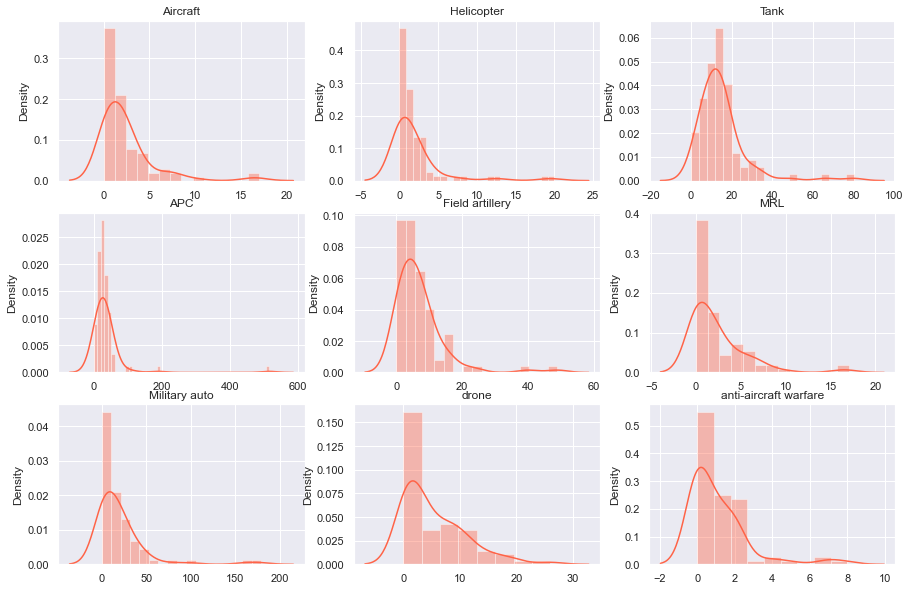

In [72]:
figure, axis = plt.subplots(3, 3, figsize=(15, 10))

sns.distplot(df_equipment['aircraft'], ax = axis[0,0], hist = True, kde = True, color = "tomato", axlabel = False).set(title='Aircraft')
sns.distplot(df_equipment['helicopter'], ax = axis[0,1], hist = True, kde = True, color = "tomato", axlabel = False).set(title='Helicopter')
sns.distplot(df_equipment['tank'], ax = axis[0,2], hist = True, kde = True, color = "tomato", axlabel = False).set(title='Tank')
sns.distplot(df_equipment['APC'], ax = axis[1,0], hist = True, kde = True, color = "tomato", axlabel = False).set(title='APC')
sns.distplot(df_equipment['field artillery'], ax = axis[1,1], hist = True, kde = True, color = "tomato", axlabel = False).set(title='Field artillery')
sns.distplot(df_equipment['MRL'], ax = axis[1,2], hist = True, kde = True, color = "tomato", axlabel = False).set(title='MRL')
sns.distplot(df_equipment['military auto'], ax = axis[2,0], hist = True, kde = True, color = "tomato", axlabel = False).set(title='Military auto')
#sns.distplot(df_equipment['fuel tank'], ax = axis[1,3], hist = True, kde = True, color = "tomato", axlabel = False).set(title='Fuel tank')
sns.distplot(df_equipment['drone'], ax = axis[2,1], hist = True, kde = True, color = "tomato", axlabel = False).set(title='drone')
sns.distplot(df_equipment['anti-aircraft warfare'], ax = axis[2,2], hist = True, kde = True, color = "tomato", axlabel = False).set(title='anti-aircraft warfare')
#sns.distplot(df_equipment['vehicles and fuel tanks'], ax = axis[2,2], hist = True, kde = True, color = "tomato", axlabel = False).set(title='vehicles and fuel tanks')
#sns.distplot(df_equipment['cruise missiles'], ax = axis[2,3], hist = True, kde = True, color = "tomato", axlabel = False).set(title='Cruise missiles')
#sns.distplot(df_equipment['special equipment'], ax = axis[1,2], hist = True, kde = True, color = "tomato", axlabel = False).set(title='Special equipment')
plt.show()

### Denisty/Scatter plot for Equipment losses

The density/ scatter plot show largely denser at the initial days until mid of the war and become less scattered as the days pass.

<Figure size 1296x720 with 0 Axes>

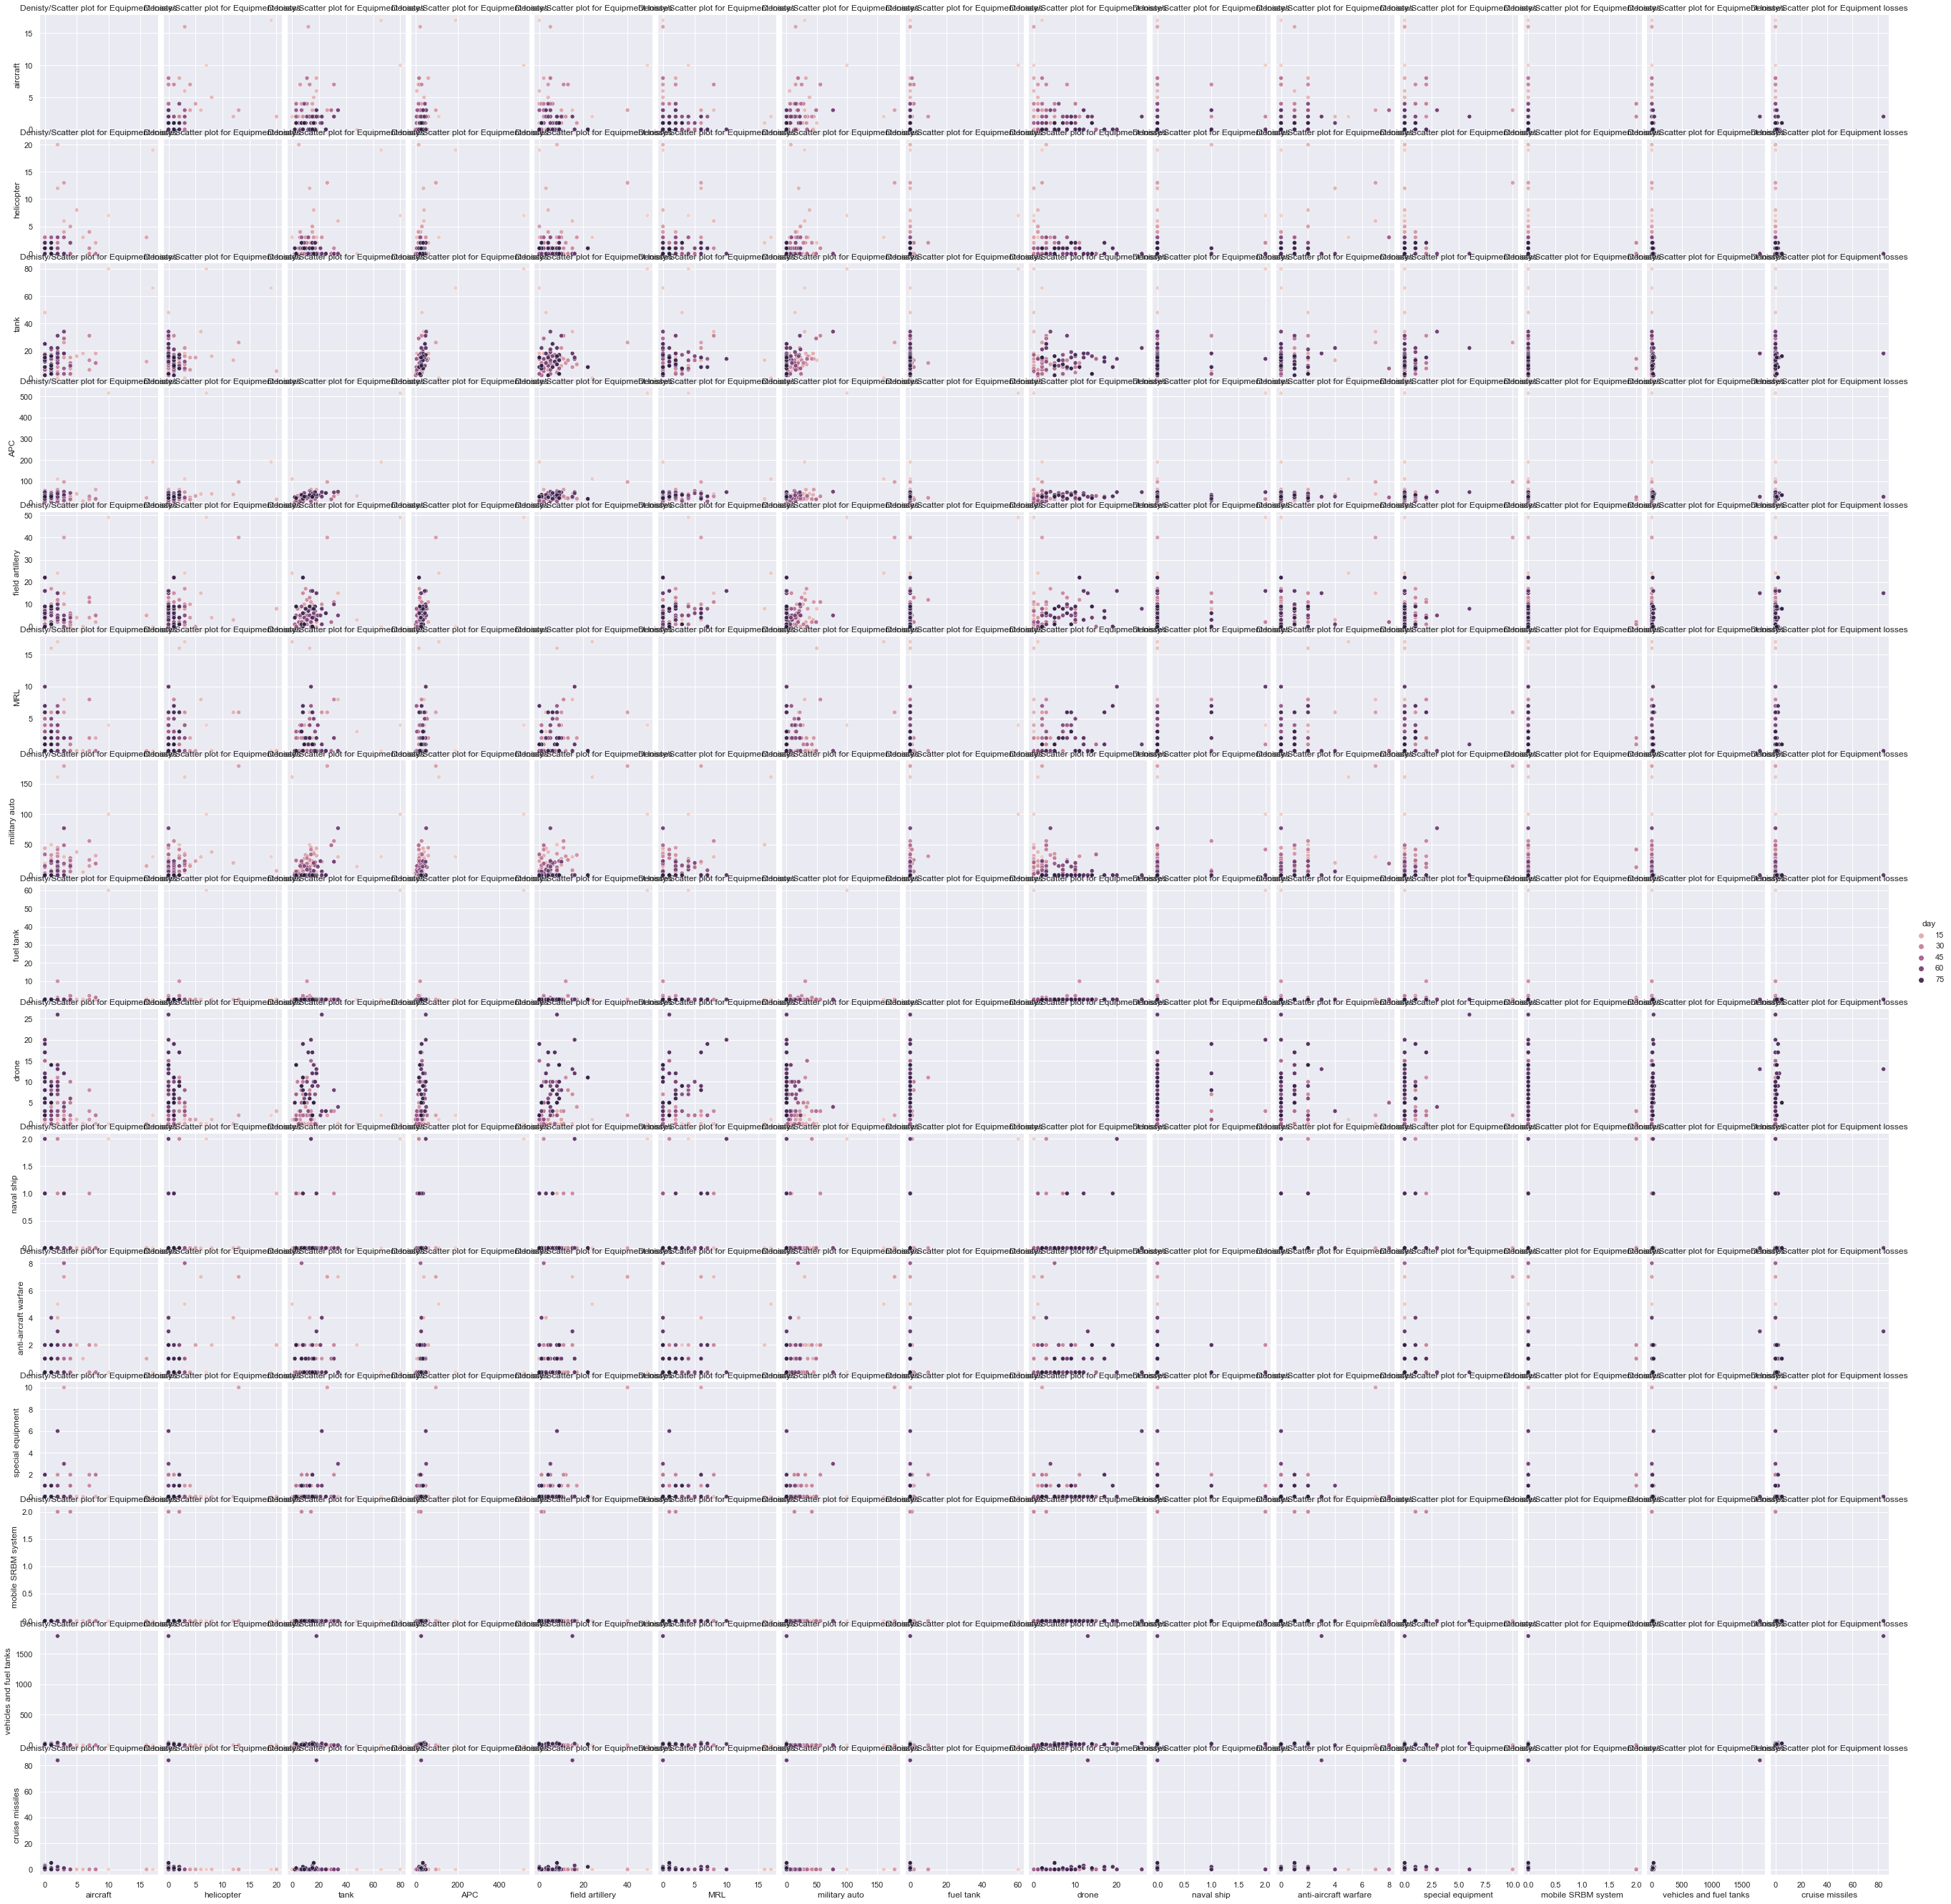

In [89]:
plt.figure(figsize=(18,10))

sns.set_theme(style="darkgrid")

den_scat = sns.pairplot(df_equipment, hue="day")
den_scat.set(title="Denisty/Scatter plot for Equipment losses")
plt.show()

### Correlation matrix for Equipment type lost

We don't see much correlation except for APC-fuel tank

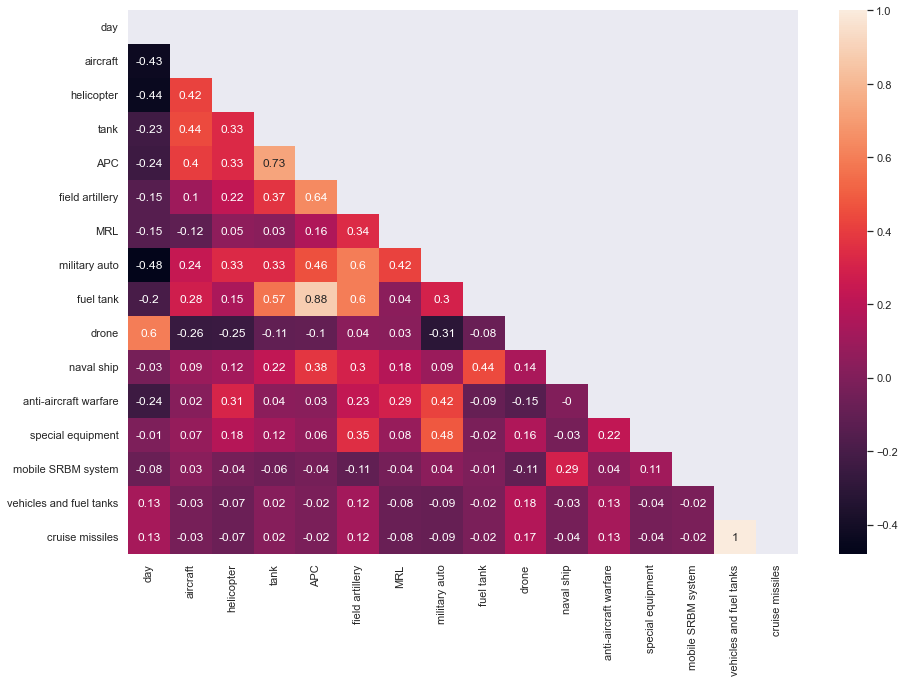

In [90]:
plt.figure(figsize=(15,10))

matrix = df_equipment.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))

hm = sns.heatmap(matrix, annot = True, mask=mask)

plt.show()

### Personnel losses

I downloaded from the same kaggle dataset the personnel losses dataset and uploaded on my git account. I will be using the file from my git account for this project.

In [42]:
#Read the Personnel.csv into df_personnel
df_personnel = pd.read_csv("https://raw.githubusercontent.com/petferns/DATA602/main/russia_losses_personnel.csv")
df_personnel.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200


In [43]:
# As the above data is commutative below we get the data each day wise for our further analysis
df_personnel['date'] = pd.to_datetime(df_personnel['date'])
df_personnel = df_personnel.set_index(['date', 'day', 'personnel*'])
df_personnel = df_personnel.diff().fillna(df_personnel).fillna(0).astype(int).reset_index()

In [46]:
df_personnel.shape

(86, 5)

In [43]:
df_personnel.head()

,date,day,personnel*,personnel,POW
0,2022-02-25,2,about,2800,0
1,2022-02-26,3,about,1500,0
2,2022-02-27,4,about,200,0
3,2022-02-28,5,about,800,0
4,2022-03-01,6,about,410,200


In [40]:
df_personnel.tail()

,date,day,personnel*,personnel,POW
81,2022-05-17,83,about,-100,0
82,2022-05-18,84,about,200,0
83,2022-05-19,85,about,-200,0
84,2022-05-20,86,about,0,0
85,2022-05-21,87,about,-50,0


In [90]:
df_personnel.describe()

,day,personnel,POW
count,86.000000,86.000000,86.000000
mean,44.500000,335.465116,5.790698
std,24.969982,488.912880,23.476204
min,2.000000,0.000000,0.000000
25%,23.250000,154.000000,0.000000
50%,44.500000,200.000000,0.000000
75%,65.750000,300.000000,0.000000
max,87.000000,3160.000000,200.000000


On 3rd March highest peronnel around 3160 were lost of the Russian army followed by 25-Febth around 2800 and 1500 on 15th March. 7th, 9th and 10th are some of the days were the Russian army didn't loose any personnel.

In [44]:
df_personnel.sort_values(by="personnel", ascending=False)

,date,day,personnel*,personnel,POW
6,2022-03-03,8,about,3160,0
0,2022-02-25,2,about,2800,0
18,2022-03-15,20,about,1500,0
1,2022-02-26,3,about,1500,0
11,2022-03-08,13,about,1000,25
...,...,...,...,...,...
15,2022-03-12,17,more,0,0
14,2022-03-11,16,more,0,18
13,2022-03-10,15,more,0,11
12,2022-03-09,14,about,0,76


Russian military has lost around 28850 of its army personnel in this war.

In [67]:
personnel_lost = df_personnel["personnel"].sum()
personnel_lost

28850

We see from the below scatter plot the personnel losses were higher the initial days and as the war goes on the losses are decreased and has similar pattern for all of the other days.

<AxesSubplot:xlabel='day', ylabel='personnel'>

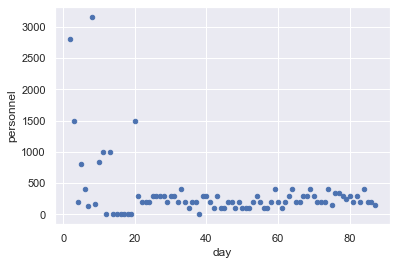

In [96]:
df_personnel.plot(kind="scatter", x="day", y="personnel", c="b")

There don't seems to be much correlation between eupiment loss and personnel loss except APC-Personnel and fuel tank-Personnel having relatively higher positive correlation.

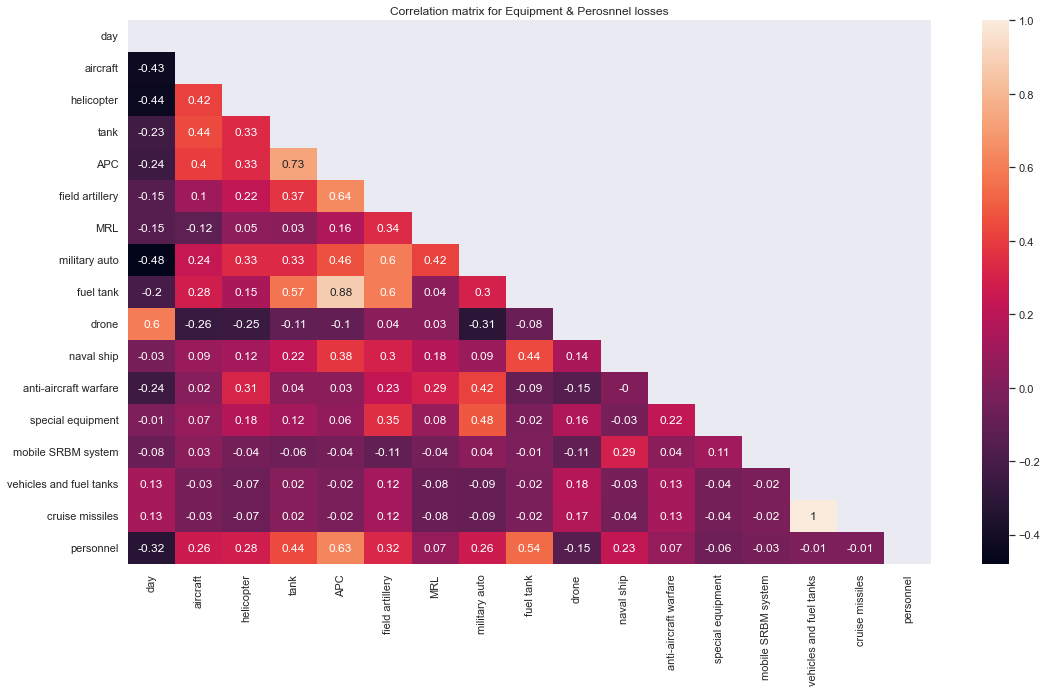

In [97]:
eqp_per = df_equipment
eqp_per["personnel"] = df_personnel["personnel"]
plt.figure(figsize=(18,10))

matrix = eqp_per.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))

hm = sns.heatmap(matrix, annot = True, mask=mask)
hm.set(title = "Correlation matrix for Equipment & Perosnnel losses")
plt.show()

## Impact on equities

I wil be using the yahoo finance to get the historical data for MOEX Russia Index. Data from a month before the war starts until today will be used to analyse the impact of the war over Russain equity. 

In [50]:
import yfinance

hist = yfinance.download('IMOEX.ME','2022-01-01','2022-05-21')

[*********************100%***********************]  1 of 1 completed


In [51]:
hist.shape

(76, 6)

In [52]:
hist.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,3825.300049,3866.149902,3823.500000,3852.500000,3852.500000,0
2022-01-04,3880.199951,3892.330078,3846.810059,3873.489990,3873.489990,0
2022-01-05,3857.899902,3875.250000,3805.060059,3815.050049,3815.050049,0
2022-01-06,3758.679932,3784.169922,3720.169922,3753.290039,3753.290039,0
2022-01-10,3798.429932,3806.840088,3726.729980,3738.679932,3738.679932,0


In [53]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76 entries, 2022-01-03 to 2022-05-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       76 non-null     float64
 1   High       76 non-null     float64
 2   Low        76 non-null     float64
 3   Close      76 non-null     float64
 4   Adj Close  76 non-null     float64
 5   Volume     76 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 4.2 KB


In [54]:
hist.describe()

,Open,High,Low,Close,Adj Close,Volume
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.0
mean,2980.931448,3029.088684,2899.901711,2957.790511,2957.790511,0.0
std,577.652677,569.909664,584.442089,575.699467,575.699467,0.0
min,2190.969971,2237.449951,1681.550049,2058.120117,2058.120117,0.0
25%,2437.154968,2462.157593,2372.999939,2420.197571,2420.197571,0.0
50%,2755.469971,2812.994995,2650.300049,2731.574951,2731.574951,0.0
75%,3528.827515,3565.652527,3490.279907,3519.609985,3519.609985,0.0
max,3880.199951,3892.330078,3846.810059,3873.489990,3873.489990,0.0


In [ ]:
#import plotly.graph_objects as go
#
#fig = go.Figure(data=go.Scatter(x=hist.index,y=hist['Close'], mode='lines'))
#fig.show()

By plotting the Close price over the selected period of time we see the index has fallen by around 50% of the value prior to the war. Initial days of the war the index has lost the highest and even though it tried to recover still the index value is much lower when compared to pre-war period.

<AxesSubplot:xlabel='Date'>

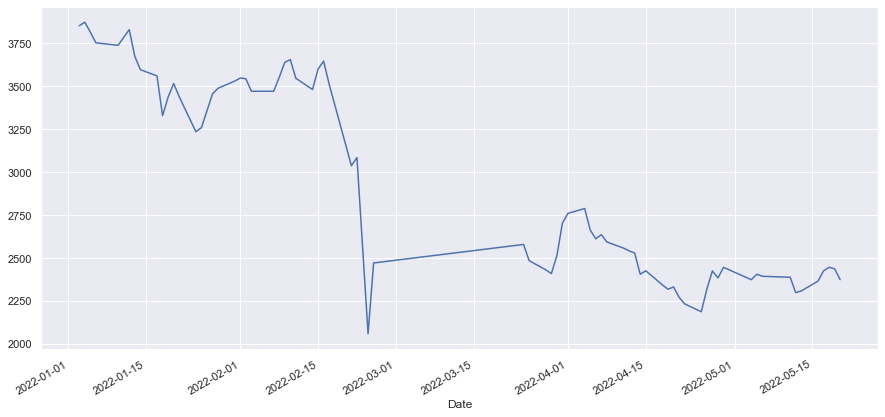

In [58]:
hist['Close'].plot(label = 'rubel', figsize = (15,7))

## RUB/ USD exchange rate impact

I will be using the data for historical exchange rate from WSJ Markets, it provides a easy way to download dataset in a csv file format. Russain Ruble(RUB) versus USD data will be used for the analysis. I uploaded the file into my git account for this project analysis.

In [59]:
#https://www.wsj.com/market-data/quotes/fx/USDRUB/historical-prices

rub_usd = pd.read_csv("https://raw.githubusercontent.com/petferns/DATA602/main/RUBUSD.csv")

In [61]:
rub_usd.shape

(100, 5)

In [62]:
rub_usd.head()

,Date,Open,High,Low,Close
0,05/20/22,0.016393,0.017264,0.015504,0.016129
1,05/19/22,0.015595,0.016380,0.015355,0.016097
2,05/18/22,0.015296,0.016129,0.015165,0.015444
3,05/17/22,0.015748,0.015842,0.015136,0.015296
4,05/16/22,0.015038,0.015860,0.014981,0.015474


In [63]:
# Remove the space from column names
#rub_usd[" Close"] = np.round(usd_rub[" Close"] , 2)
rub_usd.columns = rub_usd.columns.str.strip()

Plotting the historical currency exchange data of RUB versus USD using a plotly graph - we see on 7th of March Rubel was down by more than 50% its pre-war value.

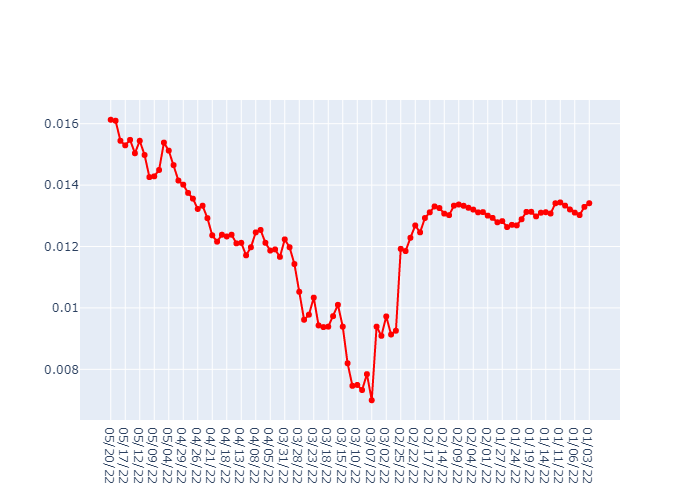

In [68]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=rub_usd['Date'],y=rub_usd['Close'], mode='lines+markers+text',marker = {'color' : 'red'}))
fig.show("png")

## Conclusion

From our analysis above its clear the Russia has lost a lot of resources of its Military and the war impact has been heavily on its Index and currency.
It has lost 423786 of its equipments across 15 categories, 28850 Military personnel. These are just official numbers in real the numbers could be much higher.
On the equity front the index lost around 50% of its value and Rubel to Dollar exchange rate was less by more than 50% of its pre-war period. These in turn affected Russia's GDP, induced higher inflation rates there by impacting most of the Russian sectors.
